<a href="https://colab.research.google.com/github/rohini6813/Movie_Rating_Pradication-/blob/main/Movie_Rating_Pradication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#import all the library That we want
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [51]:
#To read the Dataset
df = pd.read_csv("/content/drive/MyDrive/R K Data Analytic/Colab Notebooks/Data Set/IMDb Movies India.csv", encoding = 'unicode_escape')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


##Data Wrangling

In [52]:
#Present Content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [53]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [54]:
#to check how many row and column are present
df.shape

(15509, 10)

In [55]:
#check For Duplicate
df.duplicated().sum()

6

In [56]:
#to delete the duplicates rows
df.drop_duplicates(inplace = True)

In [57]:
#Check any null value
df.isnull().sum()

,0
Name,0
Year,527
Duration,8264
Genre,1876
Rating,7584
Votes,7583
Director,524
Actor 1,1615
Actor 2,2381
Actor 3,3140


In [58]:
#drop the blank row from name column
import pandas as pd

# Assuming 'df' is your DataFrame

# Drop rows with null, missing, or blank values in 'Name' column
df.drop(df[(df['Name'].isnull()) | (df['Name'].str.strip() == '')].index, inplace=True)

# Reset index if needed
df.reset_index(drop=True, inplace=True)

In [59]:
df.shape

(15502, 10)

In [60]:
df['Name']

,Name
0,#Gadhvi (He thought he was Gandhi)
1,#Homecoming
2,#Yaaram
3,...And Once Again
4,...Aur Pyaar Ho Gaya
...,...
15497,Zulm Ko Jala Doonga
15498,Zulmi
15499,Zulmi Raj
15500,Zulmi Shikari


In [61]:
#replace the iven value with nothing
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)

In [62]:
df['Year'] = df['Year'].str.replace('-', '')

In [63]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Convert 'Year' to numeric and fill missing values with mean
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'].fillna(df['Year'].mean(), inplace=True)

# Check the data type of 'Year'
print(df['Year'].dtype)  # Output: float64

float64


<ipython-input-63-327f94478790>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].mean(), inplace=True)


In [64]:
#df['Year'].fillna(df['Year'].mean(), inplace=True)

In [65]:
#first we remove the min Which is present and then convert it into float and if there is missing value is present in the column the fill with the avg of the column.
import re
# 1. Extract numerical values from Duration
def extract_duration(duration_str):
    match = re.search(r'\d+', str(duration_str))
    if match:
        return float(match.group(0))
    else:
        return None

df['Duration'] = df['Duration'].apply(extract_duration)

# 2. Impute with mean of numerical values
mean_duration = df['Duration'].mean()
df['Duration'].fillna(mean_duration, inplace=True)


<ipython-input-65-a2cfa7156606>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(mean_duration, inplace=True)


In [66]:
#In Genre column in place of nothing/blank replace with Unknown
df['Genre'].fillna('Unknown', inplace=True)

<ipython-input-66-502629543835>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].fillna('Unknown', inplace=True)


In [67]:
df['Votes'] = df['Votes'].str.replace(',', '', '$', '').astype(float)

In [68]:
df['Votes'].fillna('0', inplace=True)

<ipython-input-68-d63d62fb18ff>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Votes'].fillna('0', inplace=True)
<ipython-input-68-d63d62fb18ff>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Votes'].fillna('0', inplace=True)


In [69]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

<ipython-input-69-39d8e0ab3bf4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [70]:
df['Director'].fillna(df['Director'].mode()[0], inplace=True)

<ipython-input-70-ef5981685d3f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna(df['Director'].mode()[0], inplace=True)


In [71]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019.0,109.000000,Drama,7.000000,0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,2021.0,90.000000,"Drama, Musical",5.841621,0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,2019.0,110.000000,"Comedy, Romance",4.400000,0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,2010.0,105.000000,Drama,5.841621,0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,1997.0,147.000000,"Comedy, Drama, Musical",4.700000,0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15497,Zulm Ko Jala Doonga,1988.0,128.127918,Action,4.600000,0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15498,Zulmi,1999.0,129.000000,"Action, Drama",4.500000,0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15499,Zulmi Raj,2005.0,128.127918,Action,5.841621,0,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15500,Zulmi Shikari,1988.0,128.127918,Action,5.841621,0,Jayant Desai,NaN,NaN,NaN


In [72]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,1615
Actor 2,2381
Actor 3,3140


In [73]:
#Join the actor 1, actor 2, actor 3 in one column with the name of Actors and there is any missing value fill with Unknown
df['Actors'] = df['Actor 1'].astype(str) + ', ' + df['Actor 2'].astype(str) + ', ' + df['Actor 3'].astype(str)
df['Actors'] = df['Actors'].str.replace('nan, ', '').str.replace(', nan', '').str.strip(', ')
df['Actors'].fillna('Unknown', inplace=True)

<ipython-input-73-0721e681a865>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Actors'].fillna('Unknown', inplace=True)


In [74]:
#Drop the previes column
df.drop(['Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15502 entries, 0 to 15501
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15502 non-null  object 
 1   Year      15502 non-null  float64
 2   Duration  15502 non-null  float64
 3   Genre     15502 non-null  object 
 4   Rating    15502 non-null  float64
 5   Votes     15502 non-null  object 
 6   Director  15502 non-null  object 
 7   Actors    15502 non-null  object 
dtypes: float64(3), object(5)
memory usage: 969.0+ KB


In [76]:
#check any randam row
df.sample()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actors
3616,Desh Ke Dushman,1989.0,128.127918,Action,3.9,0,Swaroop Kumar,"Raaj Kumar, Navin Nischol, Aditya Pancholi"


In [77]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actors,0


##EDA

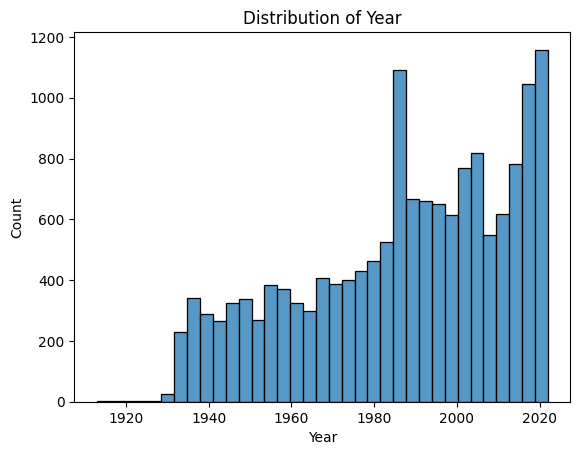

In [78]:
#
sns.histplot(df['Year'])
plt.title('Distribution of Year')
plt.show()

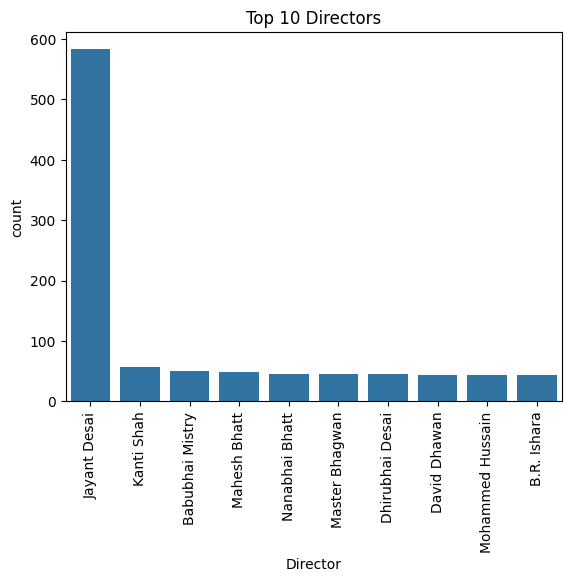

In [79]:
sns.countplot(x='Director', data=df, order=df['Director'].value_counts().iloc[:10].index)
plt.title('Top 10 Directors')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Top 10 Genres by Average Rating')

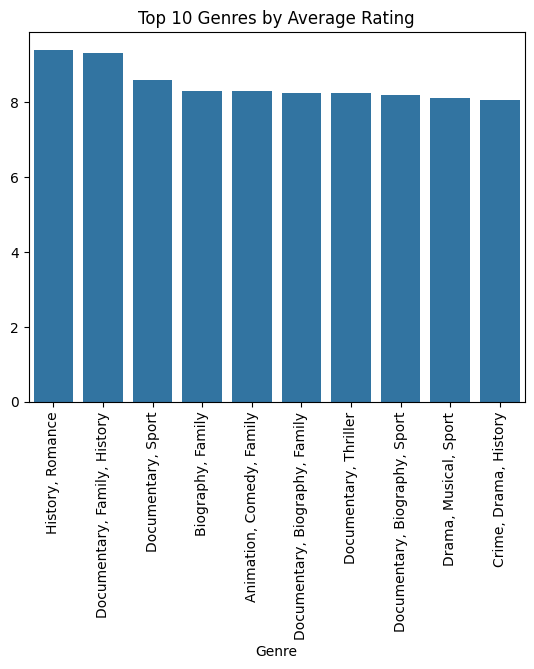

In [80]:
#1. Genre Popularity and Ratings
top_genres = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.xticks(rotation=90)
plt.title('Top 10 Genres by Average Rating')

from this Graph: History and Romance genres tend to receive the highest average ratings, indicating audience preference for these genres in Indian cinema.

Text(0.5, 1.0, 'Top 10 Directors by Average Movie Rating')

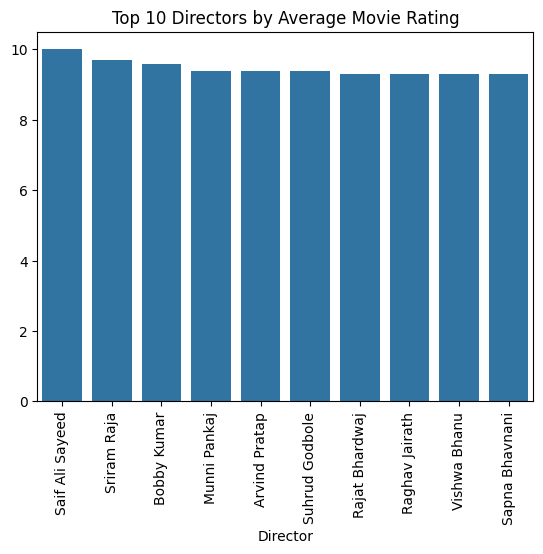

In [81]:
#2. Director and Actor Impact
# Top 10 directors by average movie rating
top_directors = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xticks(rotation=90)
plt.title('Top 10 Directors by Average Movie Rating')

From this graph: Saif Ali Sayeed is associated with higher-rated movies, suggesting their influence on the quality and reception of films.

Text(0.5, 1.0, 'Trends in Movie Releases Over Time')

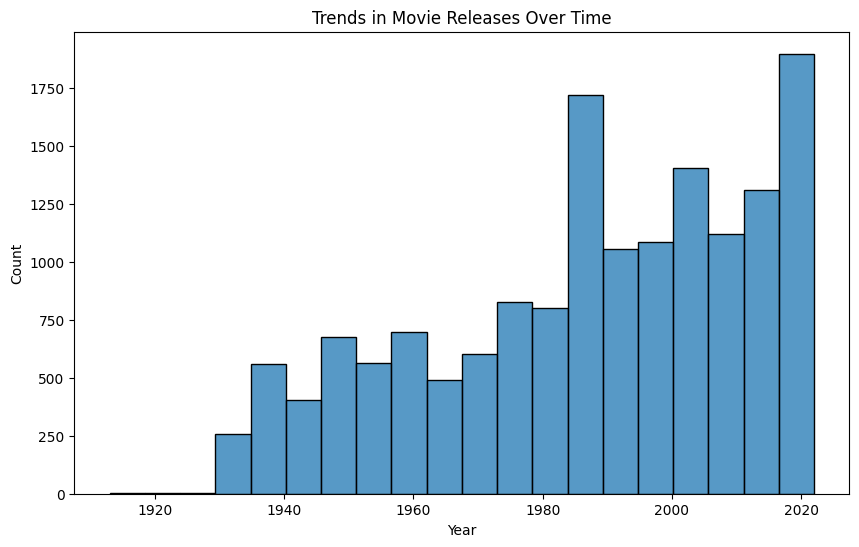

In [82]:
#5. Trends in Movie Releases
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], bins=20)
plt.title('Trends in Movie Releases Over Time')

The number of movie releases has increased steadily over the years, reflecting the growth of the Indian film industry.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

In [84]:
#KNeighborsRegressor
# Feature selection
X = df.drop(['Name', 'Rating', 'Genre', 'Director', 'Actors'], axis=1)  # Features
y = df['Rating']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_predictions)
print(f"KNN MAE: {knn_mae}")

KNN MAE: 0.70061817941485


In [85]:
#Random Forest
rf_model = RandomForestRegressor(random_state=42)  # Adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f"Random Forest MAE: {rf_mae}")

Random Forest MAE: 0.6705115384593743


In [86]:
#MAE Comparison
print(f"KNN MAE: {knn_mae}")
print(f"Random Forest MAE: {rf_mae}")

KNN MAE: 0.70061817941485
Random Forest MAE: 0.6705115384593743
